In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 13.0) # resize graphs
import matplotlib.pyplot as plt
from sklearn import manifold, decomposition
from sklearn.model_selection import train_test_split

DATA_DIR = '../../local_data/features/'

In [2]:
%%time

X = np.load(os.path.join(DATA_DIR, 'features-new.npy'))
y = np.load(os.path.join(DATA_DIR, 'labels-new.npy'))[0]

_, X_test, _, y_test = train_test_split(X, y, test_size=0.005)

algo = manifold.TSNE(n_components=2, perplexity=10, init='pca')
#algo = manifold.MDS(n_components=2, n_jobs=2) # num cpu cores, DO NOT set it to all (-1), it eats computer
#algo = decomposition.KernelPCA(n_components=2, n_jobs=4)

Y = algo.fit_transform(X_test)

CPU times: user 4min, sys: 10.5 s, total: 4min 11s
Wall time: 4min 9s


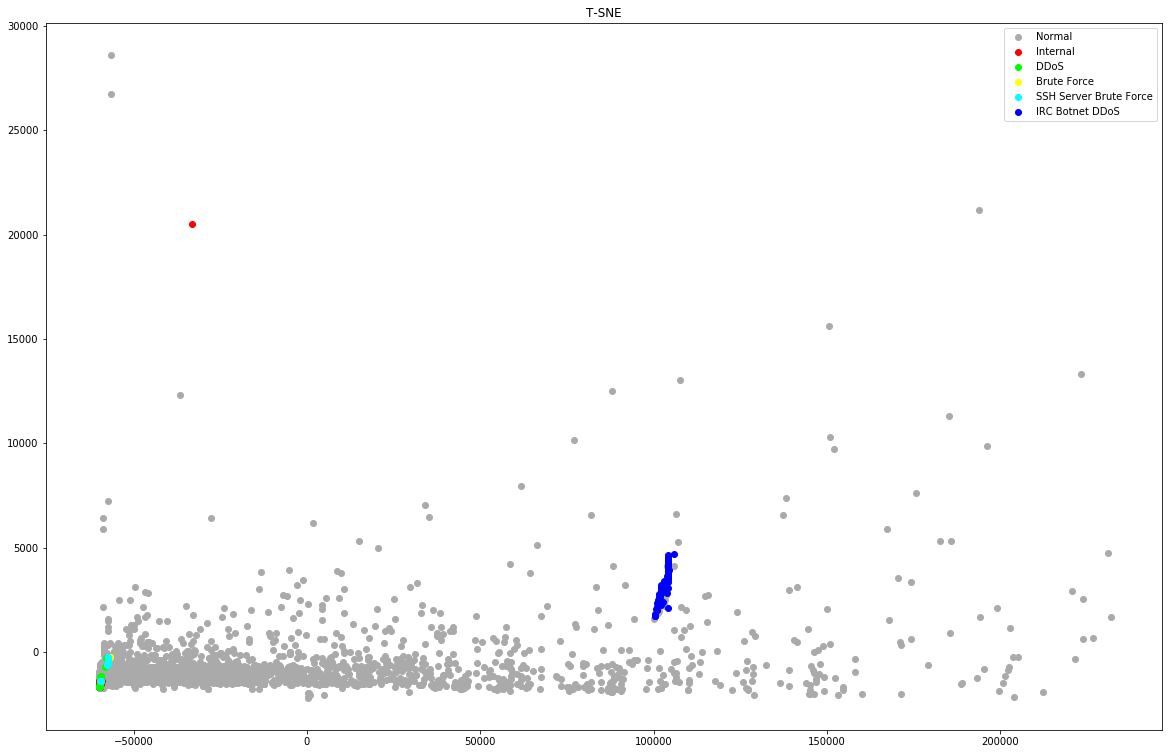

CPU times: user 472 ms, sys: 452 ms, total: 924 ms
Wall time: 424 ms


In [3]:
%%time

colors = {'internal': "#FF0000", 
          'ddos': "#00FF00",
          'irc_botnet_ddos': "#0000FF",
          'brute_force': "#FFFF00",
          'ssh_brute_force': "#00FFFF",
          'Normal': "#AAAAAA"
         }

labels =  {'internal': "Internal", 
          'ddos': "DDoS",
          'irc_botnet_ddos': "IRC Botnet DDoS",
          'brute_force': "Brute Force",
          'ssh_brute_force': "SSH Server Brute Force",
          'Normal': "Normal"
         }

# separate out attacks and normals so we can plot the normals at the bottom
# otherwise they cover a lot of the attacks
data = {k: {'x':[],'y':[]} for k in ['Normal','internal','ddos','irc_botnet_ddos','brute_force','ssh_brute_force']}

mean = np.mean(Y, axis=0)
std = np.std(Y, axis=0)

def is_point_valid(point):
    # Fuck with the coefficients to make it pretty
    return abs(mean[0] - point[0]) < 0.09*abs(std[0]) and abs(mean[1] - point[1]) < 0.3*abs(std[1])

for idx, tag in enumerate(y_test):
    if is_point_valid(Y[idx]):
        data[tag]['x'].append(Y[idx,0])
        data[tag]['y'].append(Y[idx,1])

plt.scatter(data["Normal"]['x'], data["Normal"]['y'], c=colors["Normal"], label="Normal")
for k in data:
    if k is not "Normal":
        plt.scatter(data[k]['x'], data[k]['y'], c=colors[k], label=labels[k])

plt.title("T-SNE")
plt.legend()
plt.show()